# Audio data preprocessing

In [7]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

file = "sample_song.wav"

The code below performs following steps:
1. It loads the audio file specified by the file variable.
2. It resamples the audio signal to have a sampling rate of 22,050 Hz if the original sampling rate is different.
3. It returns the audio signal (signal) and the actual sampling rate (sr) as a tuple.


- _librosa_: Librosa is a Python package for music and audio analysis.

- _sr=22050_: The sr parameter specifies the target sampling rate for the audio signal. In this case, it is set to 22,050 Hz. The sampling rate represents the number of samples of audio carried per second. Setting a target sampling rate allows you to resample the audio file to a specific rate if needed.

- _librosa.load_: This function is used to load an audio file. It returns two values:

- _signal_: This is a one-dimensional NumPy array containing the audio signal. Each element in the array represents the amplitude of the audio signal at a specific point in time.
- _sr_: This is an integer representing the actual sampling rate of the loaded audio file. If the audio file has a different sampling rate than the specified target (sr=22050 in this case), Librosa will resample the audio signal to match the target rate.

<function matplotlib.pyplot.show(close=None, block=None)>

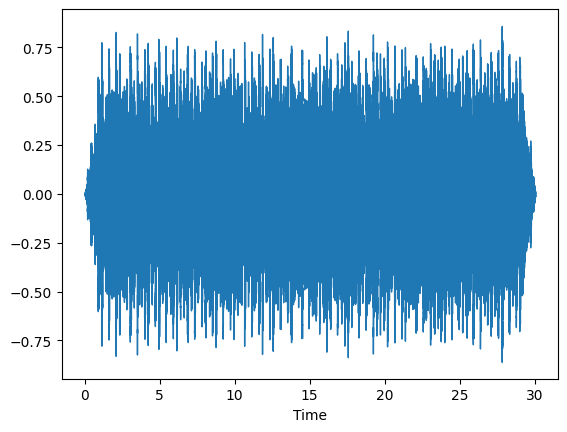

In [2]:
signal, sr = librosa.load(file, sr=22050)
librosa.display.waveshow(signal, sr=sr)
plt.xlabel = "Time"
plt.ylabel = "Amplitude"
plt.show

In [9]:
# sample of signal array that contains amplitudes
# as we can see, the amplitude data is already normalized
print(type(signal))
print("Mean:", np.mean(signal))
print("Standard Deviation:", np.std(signal))
print("Array length:", len(signal))
print(signal[:10])

<class 'numpy.ndarray'>
Mean: 0.00059509056
Standard Deviation: 0.19930393
Array length: 662644
[-1.4475663e-05 -1.2914999e-05 -5.8545265e-06  5.7742000e-07
  4.7020148e-06 -1.2490200e-06 -1.4360994e-06 -1.0154472e-05
 -3.5788398e-06 -1.9578962e-05]


### Retrieving spectrogram

We need to move th data from the time domain into the frequency domain to find out how much certain frequency contributes to a whole complex sound.

The following code is performing a Fourier Transform on an audio signal using NumPy's FFT (Fast Fourier Transform) functions and then plotting the magnitude spectrum.

- _np.fft.fft_: This function computes the one-dimensional discrete Fourier Transform of the input signal. The result (_fft_) is a complex array containing both amplitude and phase information for each frequency bin.
- _magnitude_: The resulting array contains only the amplitude information and represents the magnitude spectrum of the signal.
- _frequency_: This array contains frequencies ranging from 0 Hz to the sampling rate (_sr_) with the same length as the magnitude array. This array represents the frequency axis for the magnitude spectrum.

<function matplotlib.pyplot.show(close=None, block=None)>

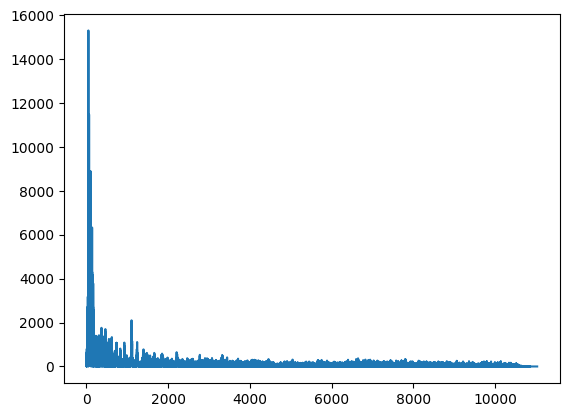

In [17]:
#@title Fourier Transform
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
magnitude = magnitude[:int(len(frequency)/2)]
frequency = frequency[:int(len(frequency)/2)]
plt.plot(frequency, magnitude)
plt.xlabel = "Frequency"
plt.ylabel = "Magnitude"
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

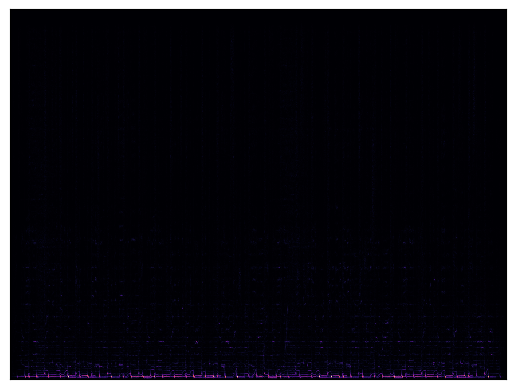

In [18]:
#@title Extracting spectrogram
n_fft = 2028
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)
librosa.display.specshow(spectrogram, hop_length=hop_length, n_fft=n_fft)
plt.xlabel = "Time"
plt.ylabel = "Frequency"
plt.colorbar
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

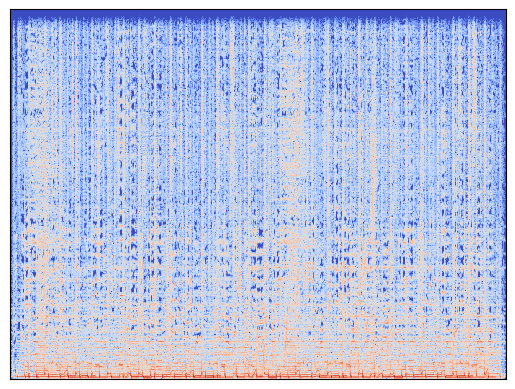

In [19]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, hop_length=hop_length, n_fft=n_fft)
plt.xlabel = "Time"
plt.ylabel = "Frequency"
plt.colorbar
plt.show

In [ ]:
#@title MFCC